In [2]:
import pandas as pd
csv_file_path = '/Users/smartha/physionet.org/files/mimiciii/1.4/'

In [149]:
df_adm = pd.read_csv(csv_file_path+'ADMISSIONS.csv.gz', compression='gzip')
df_pat = pd.read_csv(csv_file_path+'PATIENTS.csv.gz', compression='gzip')
df_notes = pd.read_csv(csv_file_path+'NOTEEVENTS.csv.gz', compression='gzip')

In [150]:
df_adm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58976 entries, 0 to 58975
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   ROW_ID                58976 non-null  int64 
 1   SUBJECT_ID            58976 non-null  int64 
 2   HADM_ID               58976 non-null  int64 
 3   ADMITTIME             58976 non-null  object
 4   DISCHTIME             58976 non-null  object
 5   DEATHTIME             5854 non-null   object
 6   ADMISSION_TYPE        58976 non-null  object
 7   ADMISSION_LOCATION    58976 non-null  object
 8   DISCHARGE_LOCATION    58976 non-null  object
 9   INSURANCE             58976 non-null  object
 10  LANGUAGE              33644 non-null  object
 11  RELIGION              58518 non-null  object
 12  MARITAL_STATUS        48848 non-null  object
 13  ETHNICITY             58976 non-null  object
 14  EDREGTIME             30877 non-null  object
 15  EDOUTTIME             30877 non-null

In [151]:
# for each patient get the latest discharge data only
assert df_adm.duplicated(['SUBJECT_ID']).sum() == 0, 'Multiple admissions per patient'

AssertionError: Multiple admissions per patient

In [152]:
df_adm = df_adm.sort_values(by=["SUBJECT_ID", "ADMITTIME"], ascending=True)

In [153]:
df_adm[df_adm.SUBJECT_ID==353]

,ROW_ID,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,LANGUAGE,RELIGION,MARITAL_STATUS,ETHNICITY,EDREGTIME,EDOUTTIME,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA
299,447,353,159730,2148-06-15 11:04:00,2148-07-04 17:48:00,NaN,URGENT,PHYS REFERRAL/NORMAL DELI,REHAB/DISTINCT PART HOSP,Medicare,NaN,JEWISH,SINGLE,WHITE,NaN,NaN,CELLULITIS RT FOOT-PVD-OSTEOMYELITIS-DM,0,1
300,448,353,108923,2151-03-28 16:01:00,2151-04-13 16:10:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,HOME,Medicare,PTUN,JEWISH,SINGLE,WHITE,2151-03-28 13:02:00,2151-03-28 17:46:00,SEPSIS,0,1
301,449,353,112976,2151-06-23 22:18:00,2151-07-04 13:22:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,HOME,Medicare,PTUN,JEWISH,SINGLE,WHITE,2151-06-23 17:37:00,2151-06-23 23:28:00,LINE SEPSIS,0,1
302,450,353,131488,2151-10-01 20:42:00,2151-10-20 15:20:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,HOME,Medicare,PTUN,JEWISH,SINGLE,WHITE,2151-10-01 10:36:00,2151-10-01 21:04:00,SEPSIS,0,1
303,451,353,159476,2153-06-27 20:15:00,2153-07-07 10:30:00,2153-07-07 10:30:00,EMERGENCY,EMERGENCY ROOM ADMIT,DEAD/EXPIRED,Medicare,PTUN,JEWISH,SINGLE,WHITE,2153-06-27 17:47:00,2153-06-27 22:32:00,POSITIVE BLOOD CULTURE;BACTEREMIA,1,1


In [154]:
df_adm = (df_adm.groupby(["SUBJECT_ID"]).nth(-1)).reset_index()

In [155]:
df_adm[df_adm.SUBJECT_ID==353]

,index,ROW_ID,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,LANGUAGE,RELIGION,MARITAL_STATUS,ETHNICITY,EDREGTIME,EDOUTTIME,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA
331,303,451,353,159476,2153-06-27 20:15:00,2153-07-07 10:30:00,2153-07-07 10:30:00,EMERGENCY,EMERGENCY ROOM ADMIT,DEAD/EXPIRED,Medicare,PTUN,JEWISH,SINGLE,WHITE,2153-06-27 17:47:00,2153-06-27 22:32:00,POSITIVE BLOOD CULTURE;BACTEREMIA,1,1


In [156]:
df_adm_pat = pd.merge(df_adm[['SUBJECT_ID','HADM_ID','ADMITTIME','DISCHTIME','ADMISSION_TYPE','DEATHTIME']],
                        df_pat[['SUBJECT_ID','DOD']],
                        on = ['SUBJECT_ID'],
                        how = 'left')


In [157]:
assert len(df_adm_pat) == len(df_adm), 'Number of rows increased'
assert len(df_adm_pat) == len(df_pat), 'Number of rows increased'
print('adm_pat :',len(df_adm_pat), '\nadm :',len(df_adm), '\npat :',len(df_pat))

adm_pat : 46520 
adm : 46520 
pat : 46520


In [158]:
df_adm_pat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46520 entries, 0 to 46519
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   SUBJECT_ID      46520 non-null  int64         
 1   HADM_ID         46520 non-null  int64         
 2   ADMITTIME       46520 non-null  object        
 3   DISCHTIME       46520 non-null  object        
 4   ADMISSION_TYPE  46520 non-null  object        
 5   DEATHTIME       5809 non-null   object        
 6   DOD             15759 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(4)
memory usage: 2.5+ MB


In [159]:
# convert to dates
df_adm_pat.ADMITTIME = pd.to_datetime(df_adm_pat.ADMITTIME, format = '%Y-%m-%d %H:%M:%S', errors = 'coerce')
df_adm_pat.DISCHTIME = pd.to_datetime(df_adm_pat.DISCHTIME, format = '%Y-%m-%d %H:%M:%S', errors = 'coerce')
df_adm_pat.DEATHTIME = pd.to_datetime(df_adm_pat.DEATHTIME, format = '%Y-%m-%d %H:%M:%S', errors = 'coerce')

df_adm_pat.DOD = pd.to_datetime(df_adm_pat.DOD, format = '%Y-%m-%d %H:%M:%S', errors = 'coerce')

In [160]:
df_adm_pat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46520 entries, 0 to 46519
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   SUBJECT_ID      46520 non-null  int64         
 1   HADM_ID         46520 non-null  int64         
 2   ADMITTIME       46520 non-null  datetime64[ns]
 3   DISCHTIME       46520 non-null  datetime64[ns]
 4   ADMISSION_TYPE  46520 non-null  object        
 5   DEATHTIME       5809 non-null   datetime64[ns]
 6   DOD             15759 non-null  datetime64[ns]
dtypes: datetime64[ns](4), int64(2), object(1)
memory usage: 2.5+ MB


In [161]:
print(df_adm_pat[~df_adm_pat.DEATHTIME.isnull()].shape[0])
print(df_adm_pat[df_adm_pat.DEATHTIME.isnull()].shape[0])

5809
40711


In [162]:
# Exclude hospital deaths
df_adm_pat = df_adm_pat[df_adm_pat.DEATHTIME.isnull()]

In [163]:
print(df_adm_pat[~df_adm_pat.DEATHTIME.isnull()].shape[0])
print(df_adm_pat[df_adm_pat.DEATHTIME.isnull()].shape[0])

0
40711


In [164]:
# calculate the number of days between discharge date and death at home
# pat.dod::date - adm.dischtime::date AS days_to_death
df_adm_pat['DEATH_AFTER_ADMIT_DAYS'] = (df_adm_pat.DOD - df_adm_pat.DISCHTIME).dt.total_seconds()/(24*60*60)


In [165]:
# df_adm_pat.head()
df_adm_pat.loc[~df_adm_pat.DEATH_AFTER_ADMIT_DAYS.isnull(),'DEATH_AFTER_ADMIT_DAYS']

1         225.418056
9         186.208333
15        371.521528
22        652.375000
29        338.152778
            ...     
46502    1501.427083
46503     362.434028
46506      48.302083
46513       9.141667
46518     229.447917
Name: DEATH_AFTER_ADMIT_DAYS, Length: 9950, dtype: float64

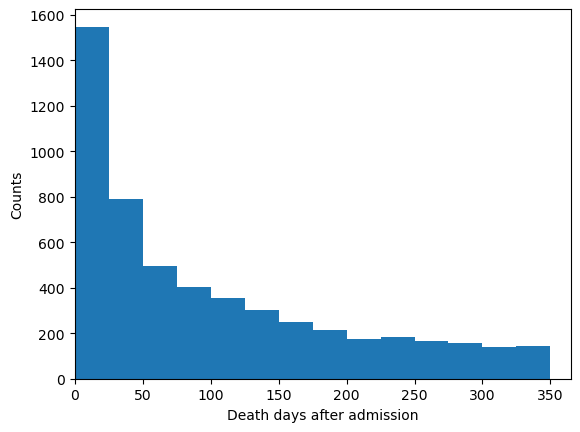

In [181]:
# plot a histogram of days between discharge and death date
# this only works for non-null values so you have to filter
import matplotlib.pyplot as plt

plt.hist(df_adm_pat.loc[~df_adm_pat.DEATH_AFTER_ADMIT_DAYS.isnull(),'DEATH_AFTER_ADMIT_DAYS'], bins =range(0,365,25))
plt.xlim([0,365])
plt.xlabel('Death days after admission')
plt.ylabel('Counts')
plt.show()

In [188]:
print(df_adm_pat[df_adm_pat.DEATH_AFTER_ADMIT_DAYS.isnull()].shape[0])
print(df_adm_pat[df_adm_pat.DEATH_AFTER_ADMIT_DAYS > 30].shape[0])
print(df_adm_pat[df_adm_pat.DEATH_AFTER_ADMIT_DAYS <= 30].shape[0])

30761
8116
1834


In [189]:
print('Number of notes:',len(df_notes))
df_notes.CATEGORY.unique()

Number of notes: 2083180


array(['Discharge summary', 'Echo', 'ECG', 'Nursing', 'Physician ',
       'Rehab Services', 'Case Management ', 'Respiratory ', 'Nutrition',
       'General', 'Social Work', 'Pharmacy', 'Consult', 'Radiology',
       'Nursing/other'], dtype=object)

In [193]:
df_notes_dis_sum = df_notes.loc[df_notes.CATEGORY == 'Discharge summary']

In [194]:
assert df_notes_dis_sum.duplicated(['HADM_ID']).sum() == 0, 'Multiple discharge summaries per admission'

AssertionError: Multiple discharge summaries per admission

In [195]:
df_notes_dis_sum_last = (df_notes_dis_sum.groupby(['SUBJECT_ID','HADM_ID']).nth(-1)).reset_index()

In [196]:
assert df_notes_dis_sum_last.duplicated(['HADM_ID']).sum() == 0, 'Multiple discharge summaries per admission'

In [197]:
df_notes_dis_sum_last.loc[:,['SUBJECT_ID','HADM_ID','TEXT']]

,SUBJECT_ID,HADM_ID,TEXT
0,13702,107527.0,Admission Date: [**2118-6-2**] Discharg...
1,13702,167118.0,Admission Date: [**2119-5-4**] D...
2,13702,196489.0,Admission Date: [**2124-7-21**] ...
3,26880,135453.0,Admission Date: [**2162-3-3**] D...
4,53181,170490.0,Admission Date: [**2172-3-5**] D...
...,...,...,...
52721,93924,135672.0,"Name: [**Known lastname 18321**],[**Known fir..."
52722,17782,155710.0,"Name: [**Known lastname 2706**], [**Known fir..."
52723,96333,183951.0,Name: [**Known lastname 18357**]-[**Known las...
52724,66717,169165.0,"Name: [**Known lastname **],[**Known firstnam..."


In [198]:
df_adm_pat.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40711 entries, 0 to 46519
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   SUBJECT_ID              40711 non-null  int64         
 1   HADM_ID                 40711 non-null  int64         
 2   ADMITTIME               40711 non-null  datetime64[ns]
 3   DISCHTIME               40711 non-null  datetime64[ns]
 4   ADMISSION_TYPE          40711 non-null  object        
 5   DEATHTIME               0 non-null      datetime64[ns]
 6   DOD                     9950 non-null   datetime64[ns]
 7   DEATH_AFTER_ADMIT_DAYS  9950 non-null   float64       
dtypes: datetime64[ns](4), float64(1), int64(2), object(1)
memory usage: 2.8+ MB


In [200]:
df_adm_notes = pd.merge(df_adm_pat[['SUBJECT_ID','HADM_ID','ADMITTIME','DISCHTIME','ADMISSION_TYPE','DEATHTIME','DOD','DEATH_AFTER_ADMIT_DAYS']],
                        df_notes_dis_sum_last[['SUBJECT_ID','HADM_ID','TEXT']],
                        on = ['SUBJECT_ID','HADM_ID'],
                        how = 'left')
assert len(df_adm_pat) == len(df_adm_notes), 'Number of rows increased'

In [201]:
print(len(df_adm_notes))
print(df_adm_notes.TEXT.isnull().sum())

40711
5124


In [202]:
print("Fraction of missing notes:", df_adm_notes.TEXT.isnull().sum()/len(df_adm_notes))
print("Fraction of notes with new line:", df_adm_notes.TEXT.str.contains('\n').sum()/len(df_adm_notes))
print("Fraction of ntoes with carriage return:", df_adm_notes.TEXT.str.contains('\r').sum()/len(df_adm_notes))

Fraction of missing notes: 0.12586278892682567
Fraction of notes with new line: 0.8741372110731743
Fraction of ntoes with carriage return: 0.0


In [203]:
df_adm_notes.groupby('ADMISSION_TYPE').apply(lambda a: a.TEXT.isnull().sum())/df_adm_notes.groupby('ADMISSION_TYPE').size()

ADMISSION_TYPE
ELECTIVE     0.034011
EMERGENCY    0.030776
NEWBORN      0.540026
URGENT       0.027491
dtype: float64

In [204]:
df_adm_notes_clean = df_adm_notes.loc[df_adm_notes.ADMISSION_TYPE != 'NEWBORN'].copy()

In [206]:
# Keep another copy incase of data corrupt
print(df_adm_notes_clean.info())
df_adm_notes_clean_cp = df_adm_notes_clean
print(df_adm_notes_clean_cp.info())

<class 'pandas.core.frame.DataFrame'>
Index: 33141 entries, 1 to 40710
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   SUBJECT_ID              33141 non-null  int64         
 1   HADM_ID                 33141 non-null  int64         
 2   ADMITTIME               33141 non-null  datetime64[ns]
 3   DISCHTIME               33141 non-null  datetime64[ns]
 4   ADMISSION_TYPE          33141 non-null  object        
 5   DEATHTIME               0 non-null      datetime64[ns]
 6   DOD                     9948 non-null   datetime64[ns]
 7   DEATH_AFTER_ADMIT_DAYS  9948 non-null   float64       
 8   TEXT                    32105 non-null  object        
dtypes: datetime64[ns](4), float64(1), int64(2), object(2)
memory usage: 2.5+ MB
None
<class 'pandas.core.frame.DataFrame'>
Index: 33141 entries, 1 to 40710
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dty

In [207]:
df_adm_notes_clean['OUTPUT_LABEL'] = (df_adm_notes_clean.DEATH_AFTER_ADMIT_DAYS < 30).astype('int')

In [208]:
print('Number of positive samples:', (df_adm_notes_clean.OUTPUT_LABEL == 1).sum())
print('Number of negative samples:',  (df_adm_notes_clean.OUTPUT_LABEL == 0).sum())
print('Total samples:', len(df_adm_notes_clean))

Number of positive samples: 1833
Number of negative samples: 31308
Total samples: 33141


In [212]:
df_adm_notes_clean = df_adm_notes_clean_cp

In [213]:
df_adm_notes_clean['OUTPUT_LABEL'] = (df_adm_notes_clean.DEATH_AFTER_ADMIT_DAYS <= 30).astype('int')

In [214]:
print('Number of positive samples:', (df_adm_notes_clean.OUTPUT_LABEL == 1).sum())
print('Number of negative samples:',  (df_adm_notes_clean.OUTPUT_LABEL == 0).sum())
print('Total samples:', len(df_adm_notes_clean))

Number of positive samples: 1833
Number of negative samples: 31308
Total samples: 33141


In [215]:
# shuffle the samples
df_adm_notes_clean = df_adm_notes_clean.sample(n = len(df_adm_notes_clean), random_state = 42)
df_adm_notes_clean = df_adm_notes_clean.reset_index(drop = True)

# Save 30% of the data as validation and test data
df_valid_test=df_adm_notes_clean.sample(frac=0.30,random_state=42)

df_test = df_valid_test.sample(frac = 0.5, random_state = 42)
df_valid = df_valid_test.drop(df_test.index)

# use the rest of the data as training data
df_train_all=df_adm_notes_clean.drop(df_valid_test.index)

print('Test prevalence(n = %d):'%len(df_test),df_test.OUTPUT_LABEL.sum()/ len(df_test))
print('Valid prevalence(n = %d):'%len(df_valid),df_valid.OUTPUT_LABEL.sum()/ len(df_valid))
print('Train all prevalence(n = %d):'%len(df_train_all), df_train_all.OUTPUT_LABEL.sum()/ len(df_train_all))
print('all samples (n = %d)'%len(df_adm_notes_clean))
assert len(df_adm_notes_clean) == (len(df_test)+len(df_valid)+len(df_train_all)),'math didnt work'

Test prevalence(n = 4971): 0.05371152685576343
Valid prevalence(n = 4971): 0.05813719573526453
Train all prevalence(n = 23199): 0.05504547609810768
all samples (n = 33141)


In [216]:
# split the training data into positive and negative
rows_pos = df_train_all.OUTPUT_LABEL == 1
df_train_pos = df_train_all.loc[rows_pos]
df_train_neg = df_train_all.loc[~rows_pos]

# merge the balanced data
df_train = pd.concat([df_train_pos, df_train_neg.sample(n = len(df_train_pos), random_state = 42)],axis = 0)

# shuffle the order of training samples
df_train = df_train.sample(n = len(df_train), random_state = 42).reset_index(drop = True)

print('Train prevalence (n = %d):'%len(df_train), df_train.OUTPUT_LABEL.sum()/ len(df_train))

Train prevalence (n = 2554): 0.5


In [220]:
# Processing the discharge summary notes 
import nltk
from nltk import word_tokenize

In [221]:
# This function preprocesses the text by filling not a number and replacing new lines ('\n') and carriage returns ('\r')
def preprocess_text(df):
    df.TEXT = df.TEXT.fillna(' ')
    df.TEXT =df.TEXT.str.replace('\n',' ')
    df.TEXT =df.TEXT.str.replace('\r',' ')
    return df

In [222]:
# preprocess the train, valid and test data sets to replace na's , newline, carriage-return with space
df_train = preprocess_text(df_train)
df_valid = preprocess_text(df_valid)
df_test = preprocess_text(df_test)

In [241]:
# tokenize the text by replacing punctuation and numbers with spaces and lowercase all words
import string

def tokenizer_better(text):
    punc_list = string.punctuation+'0123456789'
    t = str.maketrans(dict.fromkeys(punc_list, " "))
    text = text.lower().translate(t)
    # print(text)
    tokens = word_tokenize(text)
    return tokens

In [243]:
# Vectorization of words. Convert a collection of text documents to a matrix of token counts.
from sklearn.feature_extraction.text import CountVectorizer

In [244]:
vectorizer = CountVectorizer(max_features = 3000, tokenizer = tokenizer_better)
vectorizer.fit(df_train.TEXT.values)

/opt/anaconda3/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


CountVectorizer(max_features=3000,
                tokenizer=<function tokenizer_better at 0x7ff4f94bdb40>)

In [247]:
import numpy as np

neg_doc_matrix = vectorizer.transform(df_train[df_train.OUTPUT_LABEL == 0].TEXT)
pos_doc_matrix = vectorizer.transform(df_train[df_train.OUTPUT_LABEL == 1].TEXT)

neg_tf = np.sum(neg_doc_matrix,axis=0)
pos_tf = np.sum(pos_doc_matrix,axis=0)

neg = np.squeeze(np.asarray(neg_tf))
pos = np.squeeze(np.asarray(pos_tf))

term_freq_df = pd.DataFrame([neg,pos],columns=vectorizer.get_feature_names_out()).transpose()

term_freq_df.columns = ['negative', 'positive']
term_freq_df['total'] = term_freq_df['negative'] + term_freq_df['positive']
term_freq_df.sort_values(by='total', ascending=False).iloc[:10]

,negative,positive,total
the,41945,49670,91615
and,37933,46230,84163
to,32501,41216,73717
of,30309,38620,68929
was,28114,34217,62331
with,22873,28661,51534
a,21825,24696,46521
on,19130,24815,43945
in,17905,21569,39474
mg,17600,21769,39369


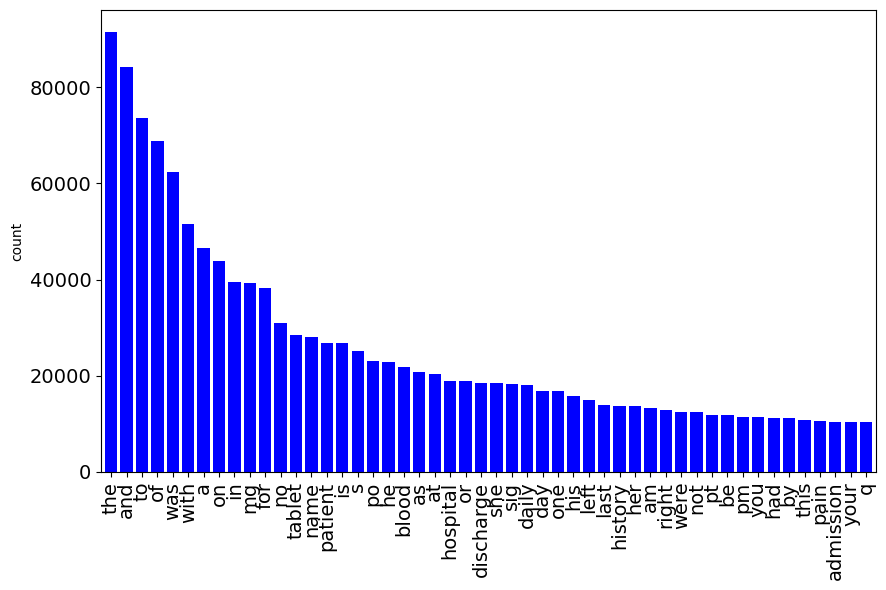

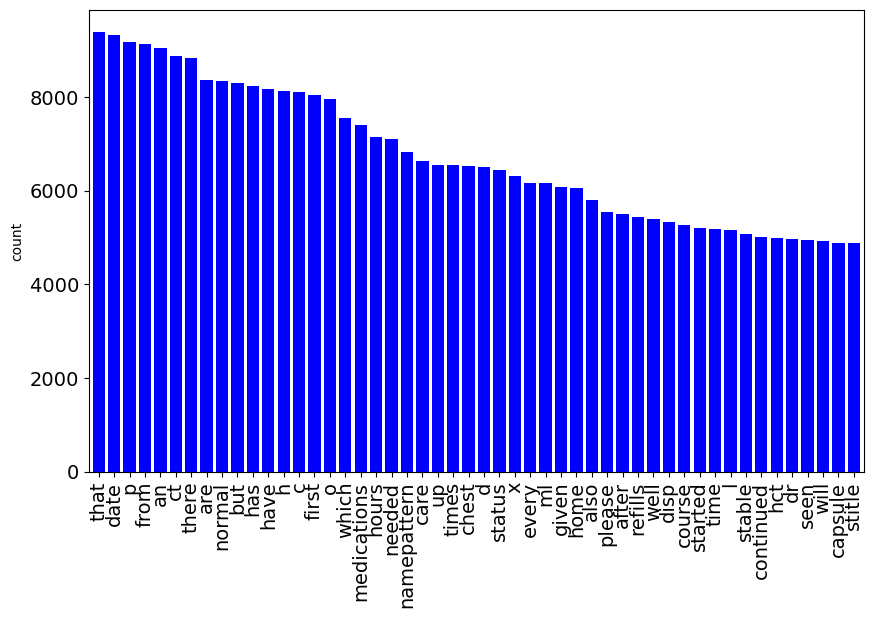

In [248]:
#Create a series from the sparse matrix
d = pd.Series(term_freq_df.total,
              index = term_freq_df.index).sort_values(ascending=False)
ax = d[:50].plot(kind='bar', figsize=(10,6), width=.8, fontsize=14, rot=90,color = 'b')
ax.title.set_size(18)
plt.ylabel('count')
plt.show()
ax = d[50:100].plot(kind='bar', figsize=(10,6), width=.8, fontsize=14, rot=90,color = 'b')
ax.title.set_size(18)
plt.ylabel('count')
plt.show()

In [249]:
new_stop_words = ['the','and','to','of','was','with','a','on','in','for','name',
                 'is','patient','s','he','at','as','or','one','she','his','her','am',
                 'were','you','pt','pm','by','be','had','your','this','date',
                'from','there','an','that','p','are','have','has','h','but','o',
                'namepattern','which','every','also','q','up','will']

In [251]:
# Re-generate word vector with updated stop words

vectorizer = CountVectorizer(max_features = 3000,
                       tokenizer = tokenizer_better,
                       stop_words = new_stop_words)

vectorizer.fit(df_train.TEXT.values)

/opt/anaconda3/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


CountVectorizer(max_features=3000,
                stop_words=['the', 'and', 'to', 'of', 'was', 'with', 'a', 'on',
                            'in', 'for', 'name', 'is', 'patient', 's', 'he',
                            'at', 'as', 'or', 'one', 'she', 'his', 'her', 'am',
                            'were', 'you', 'pt', 'pm', 'by', 'be', 'had', ...],
                tokenizer=<function tokenizer_better at 0x7ff4f94bdb40>)

In [252]:
X_train_tf = vectorizer.transform(df_train.TEXT.values)
X_valid_tf = vectorizer.transform(df_valid.TEXT.values)

In [253]:
y_train = df_train.OUTPUT_LABEL
y_valid = df_valid.OUTPUT_LABEL

In [254]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [255]:
#A quick model selection process
#pipelines of models( it is short was to fit and pred)
pipeline_lr=Pipeline([('lr_classifier',LogisticRegression(random_state=42))])

pipeline_dt=Pipeline([ ('dt_classifier',DecisionTreeClassifier(random_state=42))])

pipeline_rf=Pipeline([('rf_classifier',RandomForestClassifier())])

pipeline_svc=Pipeline([('sv_classifier',SVC())])

# List of all the pipelines
pipelines = [pipeline_lr, pipeline_dt, pipeline_rf, pipeline_svc]

# Dictionary of pipelines and classifier types for ease of reference
pipe_dict = {0: 'Logistic Regression', 1: 'Decision Tree', 2: 'RandomForest', 3: "SVC"}


# Fit the pipelines
for pipe in pipelines:
    pipe.fit(X_train_tf, y_train)
# model.fit(X_train_tf, y_train)
#cross validation on accuracy 
cv_results_accuracy = []
for i, model in enumerate(pipelines):
    cv_score = cross_val_score(model, X_train_tf,y_train, cv=10 )
    cv_results_accuracy.append(cv_score)
    print("%s: %f " % (pipe_dict[i], cv_score.mean()))

/opt/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

Logistic Regression: 0.758032 
Decision Tree: 0.719268 
RandomForest: 0.787768 
SVC: 0.779937 


In [259]:
def calc_accuracy(y_actual, y_pred, thresh):
    # this function calculates the accuracy with probability threshold at thresh
    return (sum((y_pred > thresh) & (y_actual == 1))+sum((y_pred < thresh) & (y_actual == 0))) /len(y_actual)

def calc_recall(y_actual, y_pred, thresh):
    # calculates the recall
    return sum((y_pred > thresh) & (y_actual == 1)) /sum(y_actual)

def calc_precision(y_actual, y_pred, thresh):
    # calculates the precision
    return sum((y_pred > thresh) & (y_actual == 1)) /sum(y_pred > thresh)

def calc_specificity(y_actual, y_pred, thresh):
    # calculates specificity
    return sum((y_pred < thresh) & (y_actual == 0)) /sum(y_actual ==0)

def calc_prevalence(y_actual):
    # calculates prevalence
    return sum((y_actual == 1)) /len(y_actual)

In [280]:
def print_metrics(y_train,y_train_preds, y_valid, y_valid_preds, thresh, validOrTest):
    from sklearn.metrics import roc_curve
    from sklearn.metrics import roc_auc_score

    fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_preds)
    fpr_valid, tpr_valid, thresholds_valid = roc_curve(y_valid, y_valid_preds)
    
    auc_train = roc_auc_score(y_train, y_train_preds)
    auc_valid = roc_auc_score(y_valid, y_valid_preds)
    
    print('Train AUC:%.3f'%auc_train)
    print(validOrTest,' AUC:%.3f'%auc_valid)
    
    print('Train accuracy:%.3f'%calc_accuracy(y_train, y_train_preds, thresh))
    print(validOrTest,' accuracy:%.3f'%calc_accuracy(y_valid, y_valid_preds, thresh))
    
    
    print('Train recall:%.3f'%calc_recall(y_train, y_train_preds, thresh))
    print(validOrTest,' recall:%.3f'%calc_recall(y_valid, y_valid_preds, thresh))
    
    print('Train precision:%.3f'%calc_precision(y_train, y_train_preds, thresh))
    print(validOrTest,' precision:%.3f'%calc_precision(y_valid, y_valid_preds, thresh))
    
    print('Train specificity:%.3f'%calc_specificity(y_train, y_train_preds, thresh))
    print(validOrTest,' specificity:%.3f'%calc_specificity(y_valid, y_valid_preds, thresh))
    
    print('Train prevalence:%.3f'%calc_prevalence(y_train))
    print(validOrTest,' prevalence:%.3f'%calc_prevalence(y_valid))
    
    plt.plot(fpr_train, tpr_train,'r-', label = 'Train AUC: %.2f'%auc_train)
    plt.plot(fpr_valid, tpr_valid,'b-', label = validOrTest+' AUC: %.2f'%auc_valid)
    plt.plot([0,1],[0,1],'-k')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show()

In [256]:
#Building a dictionalry with list of optional values that will me analyesed by GridSearch CV
parameters = { 
    'n_estimators': [100,150, 200,500,700,900],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,6,8,12,14,16],
    'criterion' :['gini', 'entropy'],
    'n_jobs':[-1,1,None]
}

In [257]:
#Fitting the trainingset to find parameters with best accuracy

model_rfc_params = GridSearchCV(estimator=RandomForestClassifier(), param_grid=parameters, cv= 5)
model_rfc_params.fit(X_train_tf, y_train)

#Getting the optimal parameters to use in RandomForest

model_rfc_params.best_params_

/opt/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
1080 fits failed out of a total of 3240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1080 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.10/site-packages/sklearn/base.py", line 1144, in wrapper
    estimator._validate_params()
  File "/opt/anaconda3/lib/python3.10/site-packages/sklearn/base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "/opt/anaconda3/lib/python3.10/sit

{'criterion': 'gini',
 'max_depth': 14,
 'max_features': 'sqrt',
 'n_estimators': 200,
 'n_jobs': 1}

In [262]:
# Ramdom Forest Classifier
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(**model_rfc_params.best_params_)
model.fit(X_train_tf, y_train)

RandomForestClassifier(max_depth=14, n_estimators=200, n_jobs=1)

In [263]:
cv_score = cross_val_score(model, X_train_tf,y_train, cv=10 )
print("%s: %f " % (pipe_dict[2], cv_score.mean()))

RandomForest: 0.790509 


In [264]:
y_train_preds = model.predict_proba(X_train_tf)[:,1]
y_valid_preds = model.predict_proba(X_valid_tf)[:,1]

# y_train_preds = model.predict(X_train_tf)
# y_valid_preds = model.predict(X_valid_tf)

Train AUC:0.999
Train  AUC:0.861
Train accuracy:0.963
Train  accuracy:0.826
Train recall:0.926
Train  recall:0.730
Train precision:1.000
Train  precision:0.211
Train specificity:1.000
Train  specificity:0.832
Train prevalence:0.500
Train  prevalence:0.058


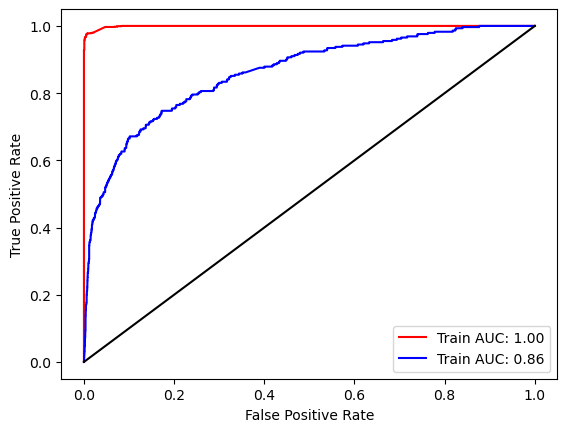

In [282]:
print_metrics(y_train, y_train_preds, y_valid, y_valid_preds, 0.5, 'Train')

In [268]:
X_test_tf = vectorizer.transform(df_test.TEXT.values)
y_test_preds = model.predict_proba(X_test_tf)[:,1]

In [269]:
y_test = df_test.OUTPUT_LABEL

Train AUC:0.999
Test  AUC:0.873
Train accuracy:0.963
Test  accuracy:0.829
Train recall:0.926
Test  recall:0.742
Train precision:1.000
Test  precision:0.202
Train specificity:1.000
Test  specificity:0.834
Train prevalence:0.500
Test  prevalence:0.054


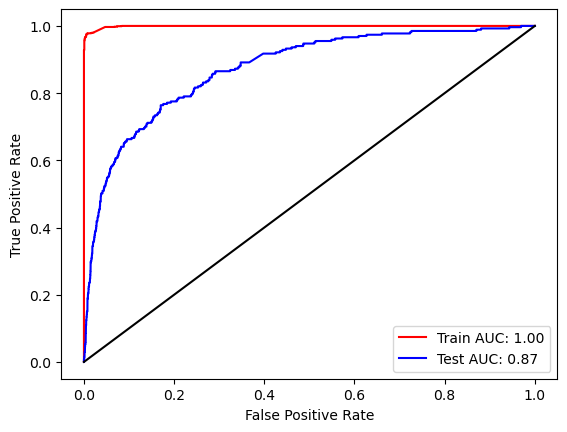

In [281]:
print_metrics(y_train, y_train_preds, y_test, y_test_preds, 0.5, 'Test')